In [5]:
!kaggle datasets download -d abdallahwagih/amazon-reviews

 99%|█████████████████████████████████████▋| 44.0M/44.3M [00:09<00:00, 7.75MB/s]
100%|██████████████████████████████████████| 44.3M/44.3M [00:09<00:00, 4.82MB/s]


In [3]:
!unzip amazon-reviews.zip -d data_input

Archive:  amazon-reviews.zip
  inflating: data_input/Cell_Phones_and_Accessories_5.json  


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [33]:
df = pd.read_json('./data_input/Cell_Phones_and_Accessories_5.json', lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [35]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3519
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [36]:
# change format of reviewTime to datetime
df['reviewTime'] = df['reviewTime'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      194439 non-null  object        
 1   asin            194439 non-null  object        
 2   reviewerName    190920 non-null  object        
 3   helpful         194439 non-null  object        
 4   reviewText      194439 non-null  object        
 5   overall         194439 non-null  int64         
 6   summary         194439 non-null  object        
 7   unixReviewTime  194439 non-null  int64         
 8   reviewTime      194439 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 13.4+ MB


In [37]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,2014-05-21
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,2014-01-14
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,2014-06-26
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,2013-10-21
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,2013-02-03


In [38]:
#find the oldest and newest review from the dataset
print(df['reviewTime'].min())
print(df['reviewTime'].max())

2001-02-22 00:00:00
2014-07-23 00:00:00


In [39]:
# find the name of reviewer that review the most
df['reviewerName'].value_counts().head(10)

reviewerName
Amazon Customer                3562
Pen Name                        344
John                            268
Chris                           234
Mike                            224
David                           218
Michael                         177
Ryan                            177
Mike Tarrani "Jazz Drummer"     152
Scott                           145
Name: count, dtype: int64

In [40]:
df['reviewText'].loc[2]

'These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!'

In [41]:
df['overall'].value_counts()

overall
5    108664
4     39993
3     21439
1     13279
2     11064
Name: count, dtype: int64

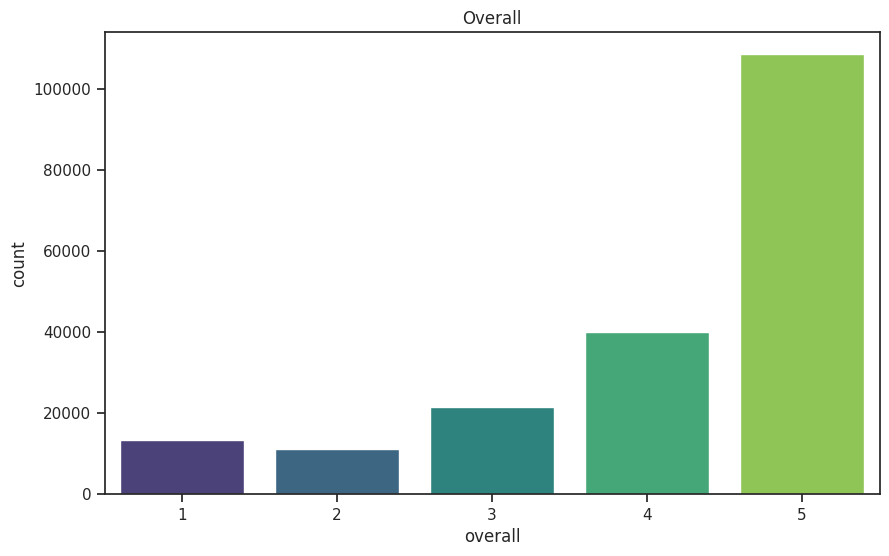

In [110]:
# make a graph about the overall

plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks")
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Overall')
plt.show()


In [42]:
# find duplicate value on reviewText
df['reviewText'].duplicated().sum()

253

In [43]:
df['reviewText'].iloc[4567]


''

In [44]:
df['reviewText'].iloc[169645]

''

In [45]:
# take a look at the duplicated reviewText
df_clean = df[df['reviewText'].duplicated(keep=False)].sort_values('reviewText')
df_clean.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
120591,A2A4NJIE3EM0NS,B0099YAWWO,Jessica,"[0, 0]",,4,Not turquoise...,1379548800,2013-09-19
130609,AR4Y501FFAJHM,B009RXU59C,"MardeeT ""MardeeT""","[34, 40]",,5,Essential Accessory In the Gadget Arsenal,1361836800,2013-02-26
130878,A1ISPRAZVRTJL9,B009RXU59C,Y. K. lee,"[0, 0]",,5,Review dual USB port wall charger,1372377600,2013-06-28
138075,A2FK5TO6LK6UVN,B00A81H176,"J. Sembower ""JS""","[14, 18]",,4,Ringke Slim Case Review,1357084800,2013-01-02
140109,A1C4BM8ZR31P90,B00ADHDYP8,Hayato Huseman,"[0, 0]",,5,"Great, stylish case.",1366588800,2013-04-22
141888,A3IBN3HJ4PGRBF,B00AJHUNZ6,RaulReviews,"[0, 0]",,5,Makes your phone looks very cool,1360800000,2013-02-14
47927,A1UA49BQP5ONTJ,B0057HJU1Q,Isaac Newsome,"[12, 13]",,5,This works! It's awesome!,1335312000,2012-04-25
47232,A1ZU55TM45Y2R8,B0055Q5F36,J. Haggard,"[91, 93]",,5,Case fits the AT&T Samsung Galaxy S2 - SGH-I7...,1319241600,2011-10-22
47106,ARIC00M54T1YD,B0055PH0XA,Robert Jones,"[83, 90]",,3,Critical Design Flaw,1367107200,2013-04-28
46765,A15IGGVWKVYTPA,B0054U6CEE,"J Steven ""steven""","[11, 14]",,1,Jsa,1344470400,2012-08-09


In [46]:
#before drop duplicate reviewText
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      194439 non-null  object        
 1   asin            194439 non-null  object        
 2   reviewerName    190920 non-null  object        
 3   helpful         194439 non-null  object        
 4   reviewText      194439 non-null  object        
 5   overall         194439 non-null  int64         
 6   summary         194439 non-null  object        
 7   unixReviewTime  194439 non-null  int64         
 8   reviewTime      194439 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 13.4+ MB


In [47]:
# after drop the duplicated reviewText

df_clean = df.drop_duplicates(subset='reviewText', keep='first')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194186 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      194186 non-null  object        
 1   asin            194186 non-null  object        
 2   reviewerName    190677 non-null  object        
 3   helpful         194186 non-null  object        
 4   reviewText      194186 non-null  object        
 5   overall         194186 non-null  int64         
 6   summary         194186 non-null  object        
 7   unixReviewTime  194186 non-null  int64         
 8   reviewTime      194186 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 14.8+ MB


In [79]:
# lets look at the duplicated on the summary

df_duplicated_summary = df_clean[df_clean['summary'].duplicated(keep=False)].sort_values('summary')
df_duplicated_summary.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
28676,A1BZ055LW3TDLP,B0043GTIR8,Chasitty,"[0, 0]",I bought this one for my husband and he loves ...,5,!,1372291200,2013-06-27
141548,A20VF3A6ZE3HYI,B00AI6K5JW,Julio Rodriguez,"[0, 0]","Loved this product, very clear, It protects yo...",5,!,1383868800,2013-11-08
42056,A21YAVV6CXO9I2,B004VPDEVC,Amanda Walk,"[0, 0]",at first i loved it but then after a little wh...,3,!,1381795200,2013-10-15
102900,A1BZ055LW3TDLP,B008HA3XRW,Chasitty,"[0, 0]",This phone case is a hit! People were always t...,5,!,1372291200,2013-06-27
81093,A1BZ055LW3TDLP,B007IE0Z74,Chasitty,"[0, 0]",I love this case! I love how the fabric is rai...,5,!,1372291200,2013-06-27
78116,A1XNGLJLDOBYDR,B007AQVGH8,Victoria Van Cleave,"[0, 0]",got here on time. Love the color! DOesnt giv...,5,!,1352764800,2012-11-13
62428,A34FW4CQ31KHKC,B005VNK7T0,Jess,"[0, 0]",These are so cute on my iphone! I have had my ...,5,!,1358640000,2013-01-20
103363,A1BZ055LW3TDLP,B008I6X802,Chasitty,"[0, 0]",I love to keep my screen protected and this ma...,5,!!,1372291200,2013-06-27
192824,A1NHB2VC68YQNM,B00JGZJOMA,Nurse Farrugia,"[0, 0]",Good sturdy case. Great for the money. Would h...,5,!!,1402617600,2014-06-13
108998,A1NY82BR8C94H3,B008RBTJVK,Taylor,"[0, 0]",Works pretty good . I used it for my galaxy s3...,5,!!!,1387670400,2013-12-22


In [80]:
# show how many duplicated summary

df_clean['summary'].duplicated().sum()


66405

In [81]:
# remove the duplicated summary

df_clean_two = df_duplicated_summary.drop_duplicates(subset='summary', keep='first')
df_clean_two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9844 entries, 28676 to 23642
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      9844 non-null   object        
 1   asin            9844 non-null   object        
 2   reviewerName    9669 non-null   object        
 3   helpful         9844 non-null   object        
 4   reviewText      9844 non-null   object        
 5   overall         9844 non-null   int64         
 6   summary         9844 non-null   object        
 7   unixReviewTime  9844 non-null   int64         
 8   reviewTime      9844 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 769.1+ KB


In [82]:
# change unixReviewTime to datetime

# df_clean_two['unixReviewTime'] = df_clean_two['unixReviewTime'].apply(pd.to_datetime, unit='s')
df_clean_two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9844 entries, 28676 to 23642
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      9844 non-null   object        
 1   asin            9844 non-null   object        
 2   reviewerName    9669 non-null   object        
 3   helpful         9844 non-null   object        
 4   reviewText      9844 non-null   object        
 5   overall         9844 non-null   int64         
 6   summary         9844 non-null   object        
 7   unixReviewTime  9844 non-null   int64         
 8   reviewTime      9844 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 769.1+ KB


In [83]:
df_clean_two.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
28676,A1BZ055LW3TDLP,B0043GTIR8,Chasitty,"[0, 0]",I bought this one for my husband and he loves ...,5,!,1372291200,2013-06-27
103363,A1BZ055LW3TDLP,B008I6X802,Chasitty,"[0, 0]",I love to keep my screen protected and this ma...,5,!!,1372291200,2013-06-27
108998,A1NY82BR8C94H3,B008RBTJVK,Taylor,"[0, 0]",Works pretty good . I used it for my galaxy s3...,5,!!!,1387670400,2013-12-22
68785,A3VRLPNRXFB1OY,B006FEBZRC,1978,"[0, 1]",OH WE..............................I LUV STITC...,5,"""MY CASE""",1379808000,2013-09-22
125110,ATX14E61DPO1,B009GSB1KU,Jasmiin,"[0, 0]",I really like my case alot It fit my iphone pe...,5,&#128077;,1398643200,2014-04-28


In [84]:
df_clean_two['unixReviewTime'] = pd.to_datetime(df_clean_two['unixReviewTime'], unit='ms').round('1s').dt.time
df_clean_two.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
28676,A1BZ055LW3TDLP,B0043GTIR8,Chasitty,"[0, 0]",I bought this one for my husband and he loves ...,5,!,21:11:31,2013-06-27
103363,A1BZ055LW3TDLP,B008I6X802,Chasitty,"[0, 0]",I love to keep my screen protected and this ma...,5,!!,21:11:31,2013-06-27
108998,A1NY82BR8C94H3,B008RBTJVK,Taylor,"[0, 0]",Works pretty good . I used it for my galaxy s3...,5,!!!,01:27:50,2013-12-22
68785,A3VRLPNRXFB1OY,B006FEBZRC,1978,"[0, 1]",OH WE..............................I LUV STITC...,5,"""MY CASE""",23:16:48,2013-09-22
125110,ATX14E61DPO1,B009GSB1KU,Jasmiin,"[0, 0]",I really like my case alot It fit my iphone pe...,5,&#128077;,04:30:43,2014-04-28


In [85]:
# sort the data by index

df_sort = df_clean_two.sort_index()
df_sort.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
34,A2I7NEVKSJ5UWR,6073894996,"Jude Chukwuma Benyeogor ""jcb""","[0, 0]","It came at last, good looking and the price wa...",4,good job,03:44:38,2014-03-27
58,A3S8BPAUQQLDKU,7532385086,Krystal,"[0, 0]","The case is not white, its more of a silver. I...",4,Not what I expected.,16:22:05,2012-12-08
63,A1PMGOX24BWDAZ,7887421268,0902virgo,"[0, 0]",I loved the case when I first received it but ...,2,Loved it at first,13:23:31,2012-08-06
90,A2EMKC5VI5MZXB,8288853439,"Suthrn Angel ""Suzy""","[0, 0]",This charger woks wonderfully on the Samsung G...,5,Works Great...,23:13:55,2013-09-20
98,A1WK0DH0W21F3G,8288862993,AndyC,"[0, 0]",The big store that is in every town now (can't...,5,It Works Great,02:09:36,2014-01-20


In [87]:
# remove column that not needed

df_sort = df_sort.drop(columns=['reviewerID', 'asin'])
df_sort.head()

,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
34,"Jude Chukwuma Benyeogor ""jcb""","[0, 0]","It came at last, good looking and the price wa...",4,good job,03:44:38,2014-03-27
58,Krystal,"[0, 0]","The case is not white, its more of a silver. I...",4,Not what I expected.,16:22:05,2012-12-08
63,0902virgo,"[0, 0]",I loved the case when I first received it but ...,2,Loved it at first,13:23:31,2012-08-06
90,"Suthrn Angel ""Suzy""","[0, 0]",This charger woks wonderfully on the Samsung G...,5,Works Great...,23:13:55,2013-09-20
98,AndyC,"[0, 0]",The big store that is in every town now (can't...,5,It Works Great,02:09:36,2014-01-20


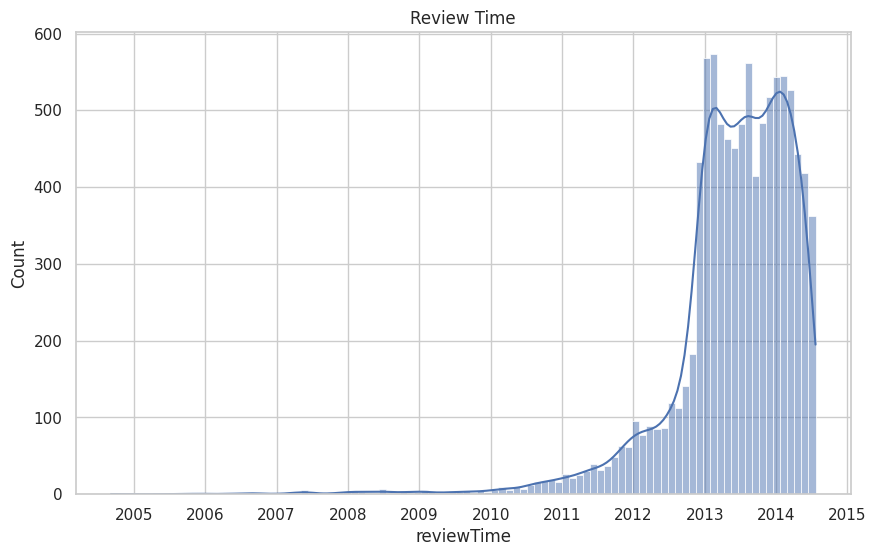

In [92]:
# make a graph about the review time

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df_sort['reviewTime'], kde=True, bins=100)
plt.title('Review Time')
plt.show()

In [97]:
# make a sentiment analysis using TextBlob library 

from textblob import TextBlob

df_sort['polarity'] = df_sort['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_sort['subjectivity'] = df_sort['reviewText'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_sort.head()


,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,polarity,subjectivity
34,"Jude Chukwuma Benyeogor ""jcb""","[0, 0]","It came at last, good looking and the price wa...",4,good job,03:44:38,2014-03-27,0.48000,0.393333
58,Krystal,"[0, 0]","The case is not white, its more of a silver. I...",4,Not what I expected.,16:22:05,2012-12-08,0.36250,0.550000
63,0902virgo,"[0, 0]",I loved the case when I first received it but ...,2,Loved it at first,13:23:31,2012-08-06,0.16875,0.377083
90,"Suthrn Angel ""Suzy""","[0, 0]",This charger woks wonderfully on the Samsung G...,5,Works Great...,23:13:55,2013-09-20,0.60000,0.722500
98,AndyC,"[0, 0]",The big store that is in every town now (can't...,5,It Works Great,02:09:36,2014-01-20,0.18750,0.402604


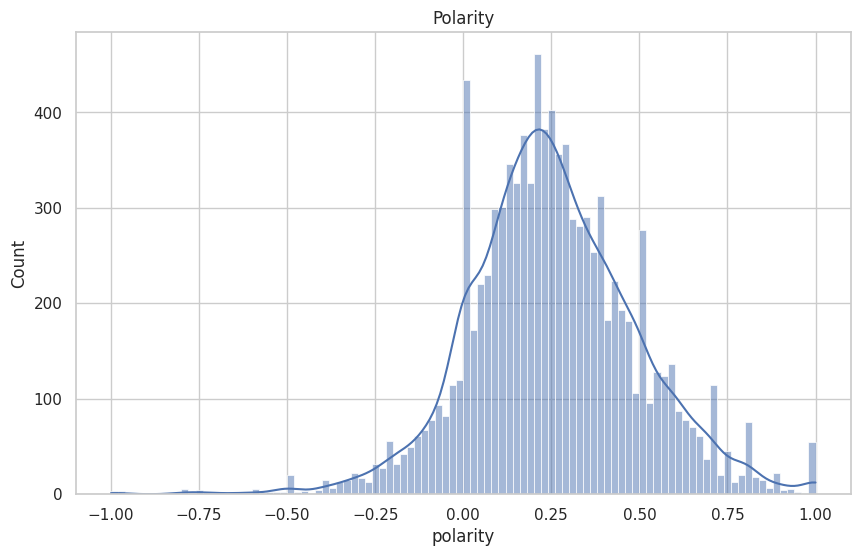

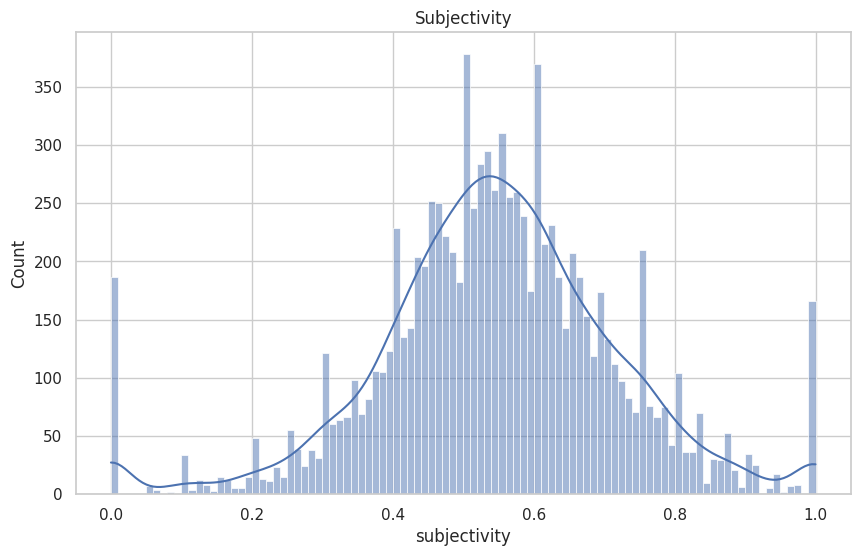

In [98]:
# visualize the polarity and subjectivity

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df_sort['polarity'], kde=True, bins=100)
plt.title('Polarity')
plt.show()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df_sort['subjectivity'], kde=True, bins=100)
plt.title('Subjectivity')
plt.show()


In [100]:
# analyze the polarity and subjectivity

df_sort['polarity'].describe()

count    9844.000000
mean        0.254321
std         0.240016
min        -1.000000
25%         0.105200
50%         0.241049
75%         0.400000
max         1.000000
Name: polarity, dtype: float64

In [101]:
df_sort['subjectivity'].describe()

count    9844.000000
mean        0.545953
std         0.175050
min         0.000000
25%         0.450000
50%         0.547222
75%         0.650000
max         1.000000
Name: subjectivity, dtype: float64

In [102]:
# correlate polarity with overall

df_sort['polarity'].corr(df_sort['overall'])


0.4135871788462635

In [103]:
df_sort['subjectivity'].corr(df_sort['overall'])


0.15466036715698056

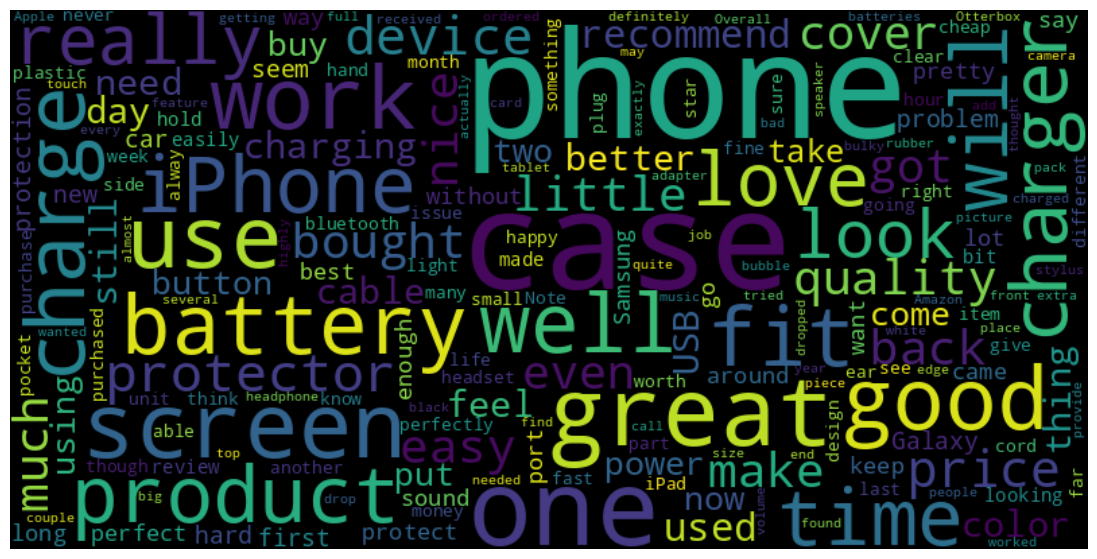

In [104]:
# make a wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(df_sort['reviewText']))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


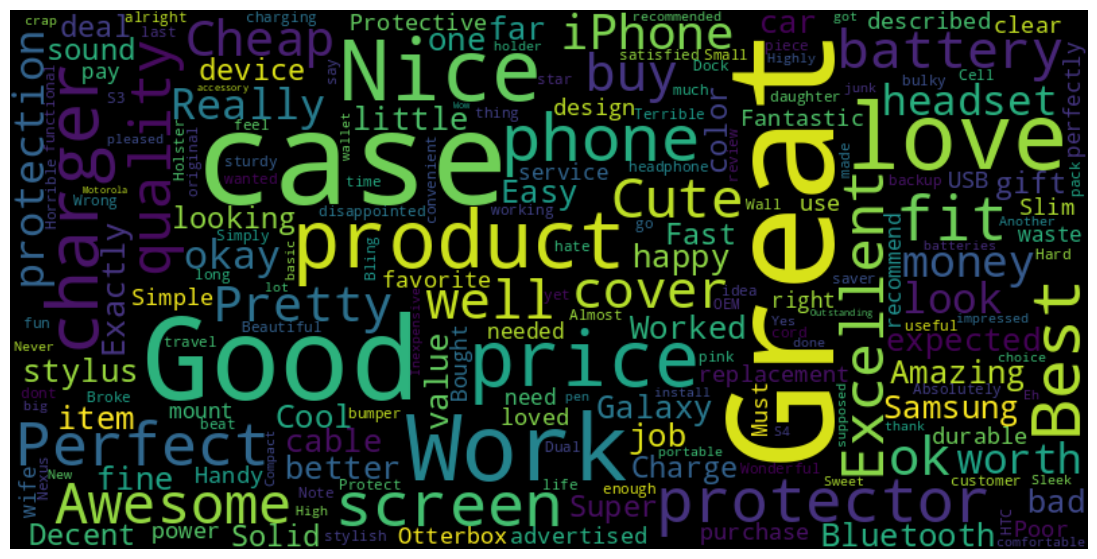

In [105]:
# make a wordcloud for the summary

wordcloud_sum = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(df_sort['summary']))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_sum, interpolation='bilinear')
plt.axis('off')
plt.show()

In [111]:
# make a graph about the reviewText length

df_sort['reviewText_length'] = df_sort['reviewText'].apply(len)
df_sort.head()


,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,polarity,subjectivity,reviewText_length
34,"Jude Chukwuma Benyeogor ""jcb""","[0, 0]","It came at last, good looking and the price wa...",4,good job,03:44:38,2014-03-27,0.48000,0.393333,126
58,Krystal,"[0, 0]","The case is not white, its more of a silver. I...",4,Not what I expected.,16:22:05,2012-12-08,0.36250,0.550000,130
63,0902virgo,"[0, 0]",I loved the case when I first received it but ...,2,Loved it at first,13:23:31,2012-08-06,0.16875,0.377083,264
90,"Suthrn Angel ""Suzy""","[0, 0]",This charger woks wonderfully on the Samsung G...,5,Works Great...,23:13:55,2013-09-20,0.60000,0.722500,136
98,AndyC,"[0, 0]",The big store that is in every town now (can't...,5,It Works Great,02:09:36,2014-01-20,0.18750,0.402604,724


In [116]:
# max reviewText length

df_sort['reviewText_length'].max()

15489

In [120]:
# min reviewText length

df_sort['reviewText_length'].min()


8

In [122]:
# Find the index of the review with the maximum length
max_length_index = df_sort['reviewText_length'].idxmax()

# Get the maximum review text length
max_length = df_sort.loc[max_length_index, 'reviewText_length']

# Get the corresponding review text
max_length_text = df_sort.loc[max_length_index, 'reviewText']

# Print the results
print(f"Maximum review text length: {max_length}")
print(f"Corresponding review text:\n{max_length_text}")


Maximum review text length: 15489
Corresponding review text:
The Samsung Galaxy S5 offers more of an evolutionary step forward in Samsung's S series smartphones than a revolutionary new phone. There are plenty of new features and advances with the S5 but those who already own a S4 likely will not be rushing to get the S5. I'm coming from an iPhone 4S so the S5 offers a lot of new features for me and provides plenty to love.FEATURES & UPGRADES FROM S4:1.  SIZE: The S5 is slightly larger at 5.59" x 2.85" x 0.32" and weighing in at 5.11 oz compared to the S4 at 5.38" x 2.75" x 0.31" and weighing at 4.59 oz. The S5 is lightweight and feels good in my hand.2.  DURABILITY: If there is one new feature on the S5 that is a game changer it's got to be the IP67 certification. IP67 certified means the S5 has total protection against dust and can survive being underwater for up to 30 minutes at a depth of 1m or less. In order to be protected against water the S5 has a little plastic plug to cover t

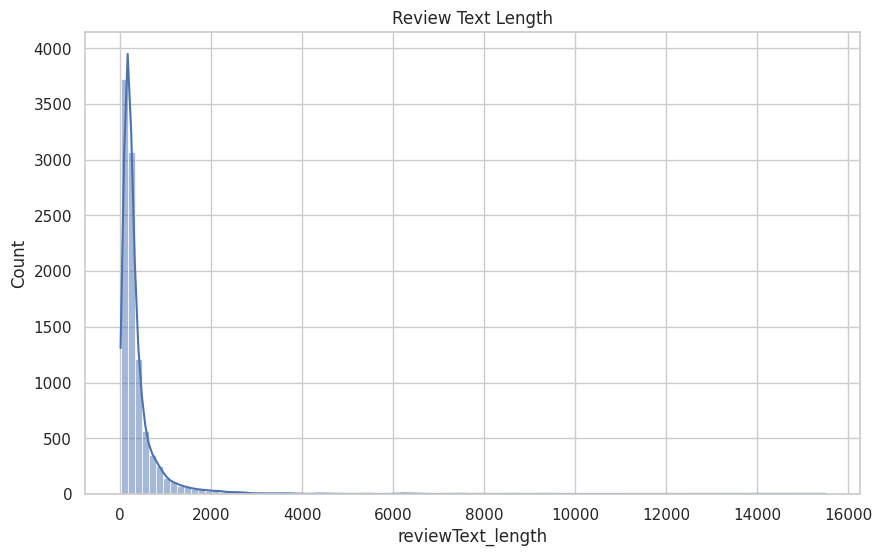

In [115]:
# visualize the reviewText length

plt.figure(figsize=(10, 6)) 
sns.set(style="whitegrid")
sns.histplot(df_sort['reviewText_length'], kde=True, bins=100)
plt.title('Review Text Length')
plt.show()